In [71]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 375.7/375.7 MB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 3.0/3.0 MB 5.5 MB/s eta 0:00:00
     -------------------------------------- 135.6/135.6 kB 2.7 MB/s eta 0:00:00
     ---------------------------------------- 4.3/4.3 MB 5.7 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 15.9/15.9 MB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 71.9/71.9 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 2.7 MB/s eta 0:00:00
     ---------------------------------------- 26.4/26.4 MB 3.8 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 4.8 MB/s eta 0:00:00
     -------------------------------------- 209.4/209.4 kB 4.3 MB/s eta 0:00:00
     ---------------------------------------- 1.5/

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.2.2 requires pyqt5<5.13, which is not installed.
spyder 5.2.2 requires pyqtwebengine<5.13, which is not installed.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
scipy 1.9.1 requires numpy<1.25.0,>=1.18.5, but you hav

In [72]:
import pandas as pd
import gymnasium as gym
import os
from ale_py import ALEInterface, roms
import time
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense
from keras.optimizers import Adam

In [5]:

env = gym.make("ALE/Frogger-v5", render_mode='human')

initial_state = env.reset()
while True:
    env.render()


    # Take a step (0: LEFT, 1: DOWN, 2: RIGHT, 3: UP)
    action = env.action_space.sample()
    new_state, reward, terminated, truncated, info = env.step(action)
    print(action)

    env.render()

time.sleep(5)

env.reset()
env.close()

ModuleNotFoundError: No module named 'gymnasium'

In [2]:
env = gym.make("ALE/Frogger-v5", render_mode='rgb_array')
initial_state = env.reset()

In [3]:
screenshot=env.render()

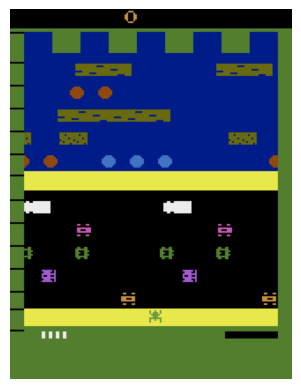

In [4]:
plt.imshow(screenshot)
plt.axis("off")
plt.show()

In [66]:
def gary(image):
    gar=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    crap=gar[12:-30, 7:-7]
    resized = cv2.resize(crap, (84, 110), interpolation=cv2.INTER_AREA)
    return resized 

In [67]:
pros=gary(screenshot)

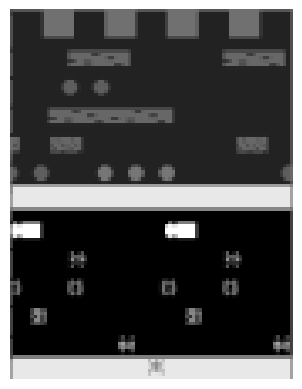

In [68]:
plt.imshow(pros,cmap='gray')
plt.axis("off")
plt.show()

In [69]:
import pickle

# Save memory to disk
def save_memory(memory, filename="checkpoints/replay_memory.pkl"):
    with open(filename, "wb") as f:
        pickle.dump(memory, f)

In [ ]:
def load_memory(filename="checkpoints/replay_memory.pkl"):
    if os.path.exists(filename):
        with open(filename, "rb") as f:
            memory = pickle.load(f)
            print("âœ… Replay memory loaded.")
            return memory
    else:
        return deque(maxlen=100000)